<a href="https://colab.research.google.com/github/harsh07021999/Winter_Project/blob/master/Cifar10_Winter_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils 
from keras.datasets import cifar10
from keras import backend as K
from matplotlib import pyplot
from PIL import Image
from sklearn.model_selection import train_test_split



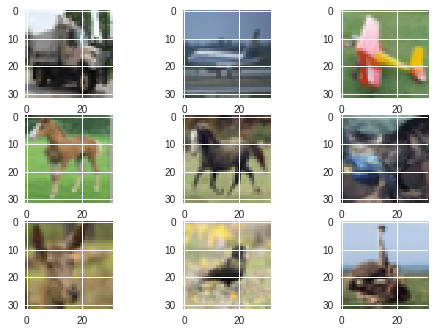

(45000, 3, 32, 32)


In [21]:

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)


for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(Image.fromarray(np.rollaxis(X_train[i],0,3),'RGB'))

pyplot.show()

K.set_image_dim_ordering('th')
seed = 7
np.random.seed(seed)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_valid = np_utils.to_categorical(y_valid)
num_classes = y_test.shape[1]
print(X_train.shape)



In [22]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = (3,32,32), padding = 'same', activation = 'relu'))
model.add(Dropout(0.22))
model.add(Conv2D(32,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.22))
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.22))
model.add(Dense(num_classes, activation='softmax'))

epochs = 25 
lrate = 0.012
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=epochs, batch_size=32)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 16, 16)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 8, 8)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
__________

In [23]:
scores = model.evaluate(X_test,y_test,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 73.55%
